In [1]:
#This project optimizes my portfolio using the efficient frontier

In [2]:
#Import the Python libraries
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
#Get the stock symbols for the five companies in my tech portfolio
assets = ['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG']

In [4]:
#Assign weights to my stocks 
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

In [5]:
#Get the stocks starting date
stockStartDate = '2013-01-01'

In [6]:
#Get the stocks ending date (today)
today = datetime.today().strftime('%Y-%m-%d')
today

'2021-09-02'

In [7]:
#Create a dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()

In [8]:

#Store the adjusted close price of the stock into the df
for stock in assets:
    df[stock] = web.DataReader(stock, data_source = 'yahoo', start = stockStartDate, end = today)['Adj Close']

In [9]:
#Show the df
df

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,28.000000,257.309998,16.985447,13.144286,360.274597
2013-01-03,27.770000,258.480011,16.771053,13.798571,360.483826
2013-01-04,28.760000,259.149994,16.303900,13.711429,367.607117
2013-01-07,29.420000,268.459991,16.207998,14.171429,366.003143
2013-01-08,29.059999,266.380005,16.251616,13.880000,365.280823
...,...,...,...,...,...
2021-08-27,372.630005,3349.629883,148.600006,558.919983,2891.010010
2021-08-30,380.660004,3421.570068,153.119995,566.179993,2909.389893
2021-08-31,379.380005,3470.790039,151.830002,569.190002,2909.239990


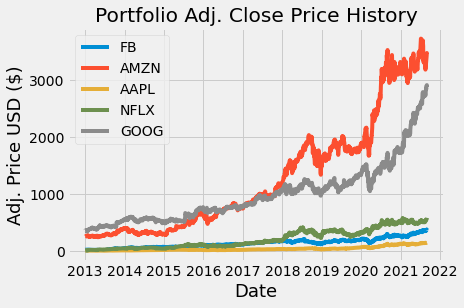

In [10]:
#Visually show the stock / portfolio
title = 'Portfolio Adj. Close Price History'

#Get the stocks
my_stocks = df

#Create and plot the graph
for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label = c)
    
plt.title(title)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Adj. Price USD ($)', fontsize = 18)
plt.legend(my_stocks.columns.values, loc = 'upper left')
plt.show()

In [11]:
#Show the daily simple return
returns = df.pct_change()
returns

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012622,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002691,-0.020565,-0.001974
...,...,...,...,...,...
2021-08-27,0.022641,0.010142,0.007185,0.015996,0.017080
2021-08-30,0.021550,0.021477,0.030417,0.012989,0.006358
2021-08-31,-0.003363,0.014385,-0.008425,0.005316,-0.000052


In [12]:
#Create and show the annualized covariance matrix (shows the relationship between the asset prices), 252 is the number of trading days for this year
cov_matrix_annual = returns.cov()*252
cov_matrix_annual

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.116027,0.053823,0.044541,0.055656,0.049840
AMZN,0.053823,0.091435,0.039637,0.061707,0.046592
AAPL,0.044541,0.039637,0.080542,0.035354,0.038167
NFLX,0.055656,0.061707,0.035354,0.203508,0.047905
GOOG,0.049840,0.046592,0.038167,0.047905,0.065339


In [13]:
#Calculate the portfolio variance 
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.06013181218720311

In [14]:
#Calculate the portfolio volatility also know as standard deviation
port_volatility = np.sqrt(port_variance)
port_volatility

0.2452178871681328

In [15]:
#Calculate the annual portfolio return
portfolioSimpleAnnualReturn = np.sum(returns.mean()*weights)*252
portfolioSimpleAnnualReturn

0.3615520932308022

In [16]:
#Show the expected annual return, volatility (risk), and variance

percent_var = str(round(port_variance, 2) * 100) + '%'
percent_vols = str(round(port_volatility, 2) * 100) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2) * 100) + '%'


print('Expected Annual Return: '+percent_ret)
print('Annual Volatility / Risk: '+percent_vols)
print('Annual Variance: '+percent_var)

Expected Annual Return: 36.0%
Annual Volatility / Risk: 25.0%
Annual Variance: 6.0%


In [17]:
pip install PyPortfolioOpt

Note: you may need to restart the kernel to use updated packages.


In [18]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [19]:
#Portfolio optimization

#Calculate the expected returns and the annualized sample covariance matrix of asset returns

mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

#Optimize for maximum sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)


OrderedDict([('FB', 0.14266), ('AMZN', 0.22737), ('AAPL', 0.26149), ('NFLX', 0.31409), ('GOOG', 0.05439)])
Expected annual return: 39.3%
Annual volatility: 26.2%
Sharpe Ratio: 1.42


(0.39291201453920827, 0.2620124212777466, 1.4232608237450788)

In [20]:
0.14266 + 0.22737 + 0.26149 + 0.31409 + 0.05439

1.0

In [ ]:
#conda install -c conda-forge cvxopt (install here)

In [21]:
#Get the discrete allocation of each share per stock

from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 20000)

allocation , leftover = da.lp_portfolio()
print('Discrete allocation:', allocation)
print('Funds remaining: ${:.2f}'.format(leftover))

Discrete allocation: {'FB': 7, 'AMZN': 1, 'AAPL': 33, 'NFLX': 10, 'GOOG': 1}
Funds remaining: $69.59
